# The Major Currents of the Ocean: Their structure and speed

The first part of this lab relates to the recorded lecture for Week 3 on the geostrophic balance, gyres and western boundary currents.

The major currents of the world ocean are driven by horizontal gradients in sea surface height and are further controlled by the Coriolis force. This exercise will enable you to estimate the sea surface height differences across some of the currents with the assistance of some digital data that you can explore using python.

You have been provided with a dataset of mean dynamic height of the global ocean, computed from a combination of satellite altimetry, in situ measurements and a geoid model. Mean dynamic height just means ‘sea surface height’ so let’s abbreviate it to SSH. The dataset is essentially a digital version of the following figure from [Rio, M. H., & Hernandez, F. (2004)](https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2003JC002226):

<div align="center">
    <img src="rio_MD_figure.png" width="30%">
</div>

SSH is the large scale topography of the ocean with waves and tides removed. You can see how the water is ‘piled up’ in the middle of the gyres. These data enable us to calculate the change in height (Dh) across a change in the east-west (Dx) or north-south (Dy) direction. We can use this gradient in SSH to calculate the speed of the current flowing around the gyre.

For each of the following ocean currents:
 - The East Australia Current (EAC) at about 34°S
 - The Antarctic Circumpolar Current (ACC), south of Tasmania at about 150°E
 - The Gulf Stream at about 35°N

onsider the mean dynamic height data set and estimate the difference in SSH (Dh) across each current. In some cases, for example the EAC, the change in SSH will be an almost symmetrical ‘lump’, like this: ![error](lump.jpg) . In this case, we will have a section from west to east (left to right) starting at the coast of Australia.  Think about the part of the SSH gradient that is generating the current. We know (from the movie “Finding Nemo”) that the EAC flows from north to south. 

Imagine a parcel of water sitting at the top of the ‘lump’ and moving under the influence of gravity down the hill to the west (left). We are in the *southern hemisphere*, so the water will be deflected by Coriolis to its *left* (to the south), which is the correct direction for the EAC. That tells us it is the Dh on the western (left) side of the lump that is generating the EAC, so you need to measure the Dh and Dx on the wester side, not the part further offshore, to the east. The offshore part of the lump is associated with a current in the opposite direction, to the north.

Keep in mind that these sections through the various currents run either N-S or E-W. The current might flow in, for example, a north-eastward direction, so your estimate of the full speed of the current might not be exact.

The **geostrophic balance equations** (from lectorial slides) can be used to calculate current speeds of the major currents on earth, and we can apply them to the currents identified above. In the lectorial we saw that the formula for eastward and northward speed of a large-scale geostrophic current at the sea surface is:

$$
\text{Eastward component}: \quad u = -\frac{g}{f} \frac{\partial h}{\partial y}
$$

$$
\text{Northward component}: \quad v = \frac{g}{f} \frac{\partial h}{\partial x}
$$

where:

 - $u$ (units of m/s) is the speed of the current in a direction parallel to contours of sea surface height or perpendicular to the gradient of sea surface height.
 - $\partial h$ (units of m) is the sea surface height difference across the current
 - $\partial x$ or $\partial y$  (units of m) are the width of the current (depending on which way the current flows)
 - $g$ is the acceleration of gravity (9.8 m/s $^{-2}$) and
 - $f$ (units of s $^{-1}$) is the Coriolis parameter, which is derived from the rate of rotation of the earth ($\Omega$) and is also a function of latitude (in °, which we convert to radians):
 
 $$
 f = 2 \Omega sin(\phi)
 $$
where $\Omega = 2 \pi /864400$ rad s-1 , corresponds to one full rotation of 2 $\pi$ radians (360 degrees) in 1 day, or 86,400 s. 

In python the function for sine (`np.sin()`) takes angle in radians as input. Multiply the angle in degrees by $\pi/180$ to convert to radians.

## Answer the following:

1.	What is the SSH difference across the current and the width of each of the 3 currents listed above?

2.	Use the geostrophic equation to estimate the current speed of each of the currents. Show your working and include units. Do a quick ‘sanity check’ to see if your numbers make sense. Our intuition tells us that large scale ocean currents are probably about 0.5 m/s or a little less. If you get an answer that’s much less than 0.01 m/s or bigger than 10 m/s, check your units.

3.	Consult any printed or web-based source of ocean currents. How do your calculations compare to observed current speeds?


# Practical

We will work with mean dynamic topography from [Rio, M. H., & Hernandez, F. (2004)](https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2003JC002226). There are newer versions available but this data set is convenient for our purposes.

The data comes in a `netcdf` file (`.nc`), which is a data file commonly used to distribute oceanographic data. It comes with dimension names and coordinates and metadata. To work with this file types we will use the `xarray` library.

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
rio_MDT = xr.open_dataarray('rio_MDT.nc')
rio_MDT

<xarray.DataArray 'rio_MDT' (latitude: 541, longitude: 1081)>
[584821 values with dtype=float64]
Coordinates:
  * longitude  (longitude) float64 0.0 0.3333 0.6667 1.0 ... 359.3 359.7 360.0
  * latitude   (latitude) float64 -90.0 -89.67 -89.33 -89.0 ... 89.33 89.67 90.0
Attributes:
    header:   MATLAB 5.0 MAT-file, Platform: GLNX86, Created on: Wed Aug 27 0...
    version:  1.0
    globals:  []

## Plot mean dynamic topography

The units are metres.

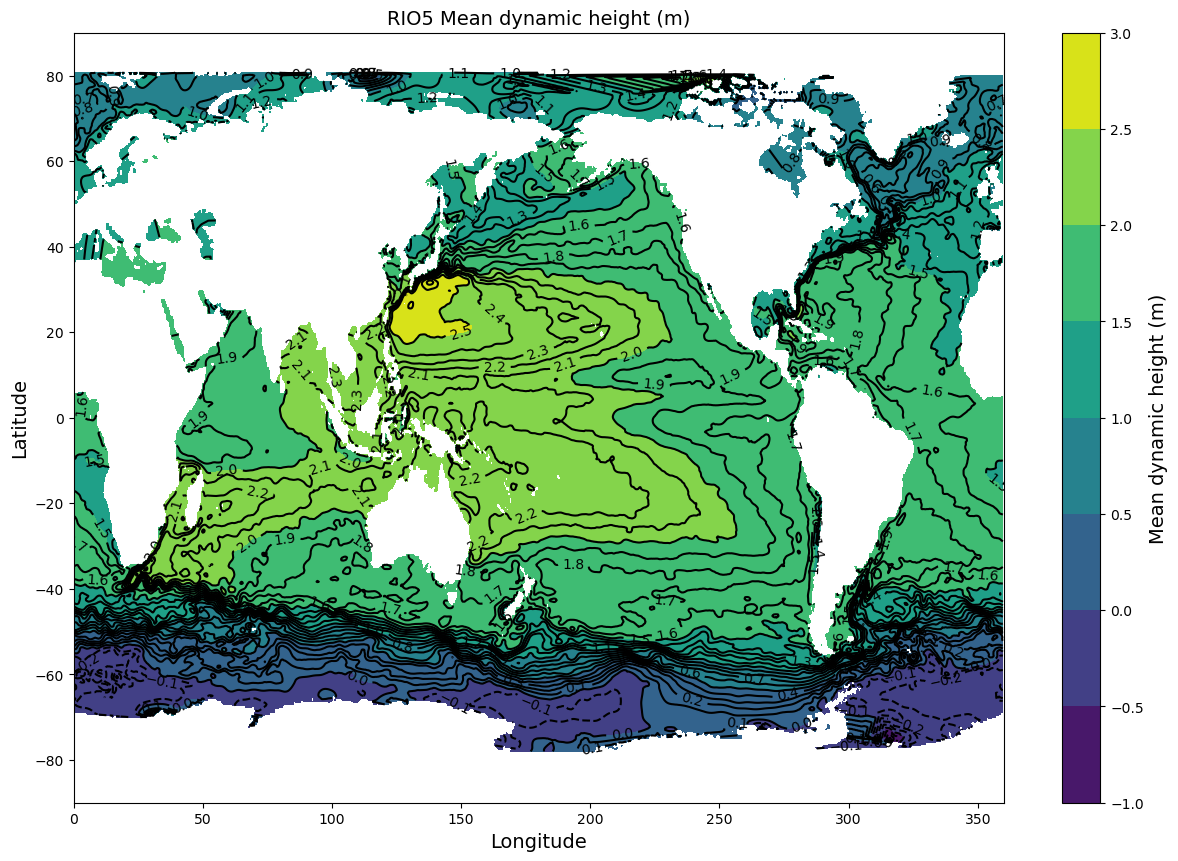

In [3]:
plt.figure(figsize = (15, 10))
CS = plt.contourf(rio_MDT['longitude'], rio_MDT['latitude'], rio_MDT)
cbar = plt.colorbar(CS)
cbar.set_label('Mean dynamic height (m)', fontsize = 14)
# Add black contours every 0.1m
CC = plt.contour(rio_MDT['longitude'], rio_MDT['latitude'], rio_MDT, 
                 levels = np.arange(-1, 3.1, .1),
                 colors = ['k'])
# Add some contour labels
plt.clabel(CC)
# Add labels for lat and lon and a title
plt.xlabel('Longitude', fontsize = 14)
plt.ylabel('Latitude', fontsize = 14)
plt.title('RIO5 Mean dynamic height (m)', fontsize = 14);
# Save the figure
plt.savefig('GlobalMeanDynamicHeight.jpg', bbox_inches = 'tight')

## Plots a section of the mean dynamic topography

Plot a section across the East Australian Current (EAC) at about 33.66 degrees south (this is about the latitude of Sydney).

We can select the region of the EAC by using the `xr.sel(dim = slice(first_point, final_point))` function, which lets you select a portion of a dataset, or a specific coordinate `.sel(dim = point, method = 'nearest')`, where the `method = 'nearest'` argument is necessary because the function will look for the exact floating point number otherwise. I.e., if the coordinate in the dataset is 33.659, not using the 'nearest' part will return an error.

In [14]:
MDT_33 = rio_MDT.sel(latitude = -33.66, method = 'nearest')
MDT_33

<xarray.DataArray 'rio_MDT' (longitude: 1081)>
array([     nan, 1.734667, 1.7324  , ..., 1.745411, 1.740367,      nan])
Coordinates:
  * longitude  (longitude) float64 0.0 0.3333 0.6667 1.0 ... 359.3 359.7 360.0
    latitude   float64 -33.67
Attributes:
    header:   MATLAB 5.0 MAT-file, Platform: GLNX86, Created on: Wed Aug 27 0...
    version:  1.0
    globals:  []

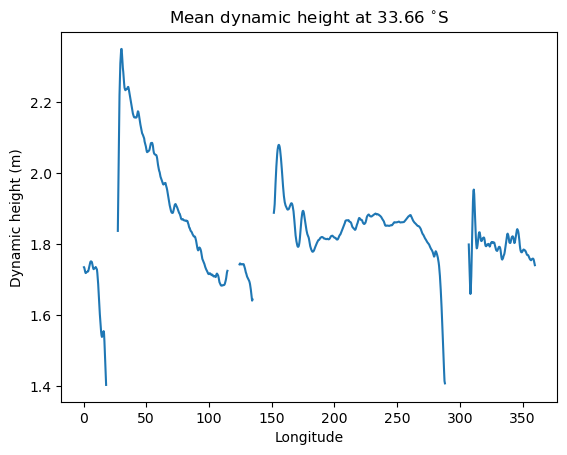

In [15]:
plt.plot(MDT_33['longitude'], MDT_33)
plt.xlabel('Longitude')
plt.ylabel('Dynamic height (m)')
plt.title('Mean dynamic height at 33.66 $^{\\circ}$S');

This is a section all the way around the globe at 33.67S. See if you can identify the Indian, Pacific and Atlantic oceans, and the western boundary currents in each. What do you think are the areas of the figure with no line drawn? How are these represented in the `MDT_33` variable?

Now zoom in on the East Australia Current longitudes 150-162E:

In [16]:
MDT_EAC = MDT_33.sel(longitude = slice(150, 162))
MDT_EAC

<xarray.DataArray 'rio_MDT' (longitude: 37)>
array([     nan,      nan,      nan,      nan,      nan, 1.88775 , 1.898125,
       1.912239, 1.942867, 1.969617, 1.994894, 2.017983, 2.036233, 2.053256,
       2.065433, 2.072567, 2.077767, 2.078911, 2.07695 , 2.072517, 2.064317,
       2.0535  , 2.041117, 2.026961, 2.011117, 1.993967, 1.976722, 1.96195 ,
       1.947967, 1.935011, 1.926017, 1.917689, 1.912533, 1.908333, 1.905833,
       1.902933, 1.900383])
Coordinates:
  * longitude  (longitude) float64 150.0 150.3 150.7 151.0 ... 161.3 161.7 162.0
    latitude   float64 -33.67
Attributes:
    header:   MATLAB 5.0 MAT-file, Platform: GLNX86, Created on: Wed Aug 27 0...
    version:  1.0
    globals:  []

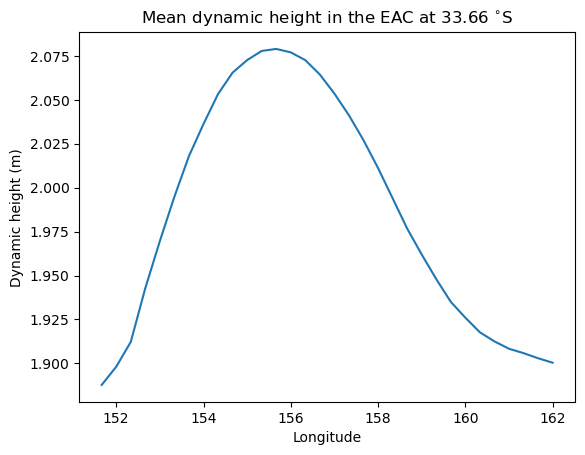

In [28]:
plt.plot(MDT_EAC['longitude'], MDT_EAC)
plt.xlabel('Longitude')
plt.ylabel('Dynamic height (m)')
plt.title('Mean dynamic height in the EAC at 33.66 $^{\\circ}$S');

We now want to change the x-axis to be distance from the coast. This is so we can calculate gradients of sea surface height across the EAC. We will define two functions to convert degrees to meters. The function `lon2m` converts from longitude to metres, `lat2m` converts from latitude to metres. 

In [18]:
def lat2m(numdegrees):
    '''
    Takes distance in degrees of latitude and converts to approx 
    meters, assumes spherical Earth
    '''
    earth_radius = 6378137 #meters
    earth_circ = 2*np.pi*earth_radius
    degrees = earth_circ/360

    output = numdegrees*degrees        

    return output

def lon2m(numdegrees, latitude):
    '''
    Takes distance in degrees of longitude and converts to approx 
    meters, assumes spherical Earth
    '''
    earth_radius = 6378137 #meters
    earth_circ = 2*np.pi*earth_radius
    degrees = earth_circ/360

    output = numdegrees*degrees*np.cos(np.pi*latitude/180)
    
    return output

In the next command, we choose 151.5E as the starting point, which means it is at zero distance along the x-axis:

In [30]:
distance_from_151E = lon2m(MDT_EAC['longitude']-151.5, -33.66)

In [31]:
# Convert to km
distance_from_151E = distance_from_151E/1000

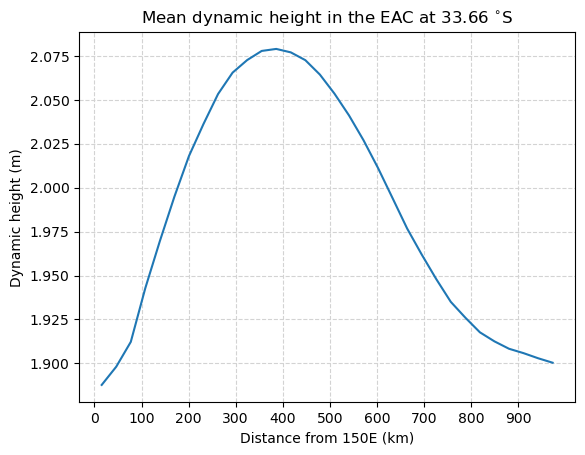

In [40]:
plt.plot(distance_from_151E, MDT_EAC)
plt.xlabel('Distance from 150E (km)')
plt.ylabel('Dynamic height (m)')
plt.title('Mean dynamic height in the EAC at 33.66 $^{\\circ}$S')
# Put a grid to be able to extract values visually
# But first increase the number of ticks
plt.xticks(np.arange(0, 1000, 100))
plt.grid(linestyle = '--', color = 'lightgrey')

Use the `.sel()` command again (don't forget about 'nearest') to get the values of dynamic height across the EAC and:

1. Estimate the height change across the current (y coordinate of maximum minus y coordinate of minimum) in metres. That gives you $dh$.

In [ ]:
# Write your code here

2. Estimate the distance change between the minimum and maximum height (x coordinate of maximum minus x coordinate of minimum) in metres. 

In [ ]:
# Write your code here

3. Calculate the speed of the EAC using the geostrophic balance equation for a meridional current (v, north-south flow). You will need to calculate the Coriolis parameter $f$. Check back to the `Introduction_python.ipynb` prac to see how to do this. Or explore whether you can use `gsw.f()` (don't forget to import the library).

In [ ]:
# Write your code here

## Gulf Stream at 35 N

Repeat what you have learnt from the EAC plotting to estimate $dh$ and $dx$ for the Gulf Stream at 35N.

In [44]:
MDT_GS = rio_MDT.sel(latitude = 35, method = 'nearest').sel(longitude = slice(140, 145))
distance_from_140E = lon2m(MDT_GS['longitude']-140, 35) / 1000

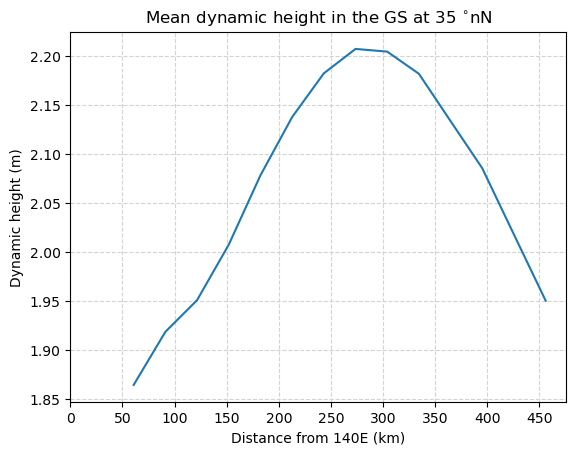

In [47]:
plt.plot(distance_from_140E, MDT_GS)
plt.xlabel('Distance from 140E (km)')
plt.ylabel('Dynamic height (m)')
plt.title('Mean dynamic height in the GS at 35 $^{\\circ}$nN')
# Put a grid to be able to extract values visually
# But first increase the number of ticks
plt.xticks(np.arange(0, 500, 50))
plt.grid(linestyle = '--', color = 'lightgrey')

# Antarctic Circumpolar Current

Repeat what you have learnt to estimate $dh$ and $dy$ for the Antarctic Circumpolar Current at 150E. The ACC is a zonal current (flows from west to east). This means you have to use the geostrophic balance equation for u.

In [48]:
MDT_ACC = rio_MDT.sel(longitude = 150, method = 'nearest').sel(latitude = slice(-60, -40))
distance_from_60S = lat2m(MDT_ACC['latitude']-(-60)) / 1000

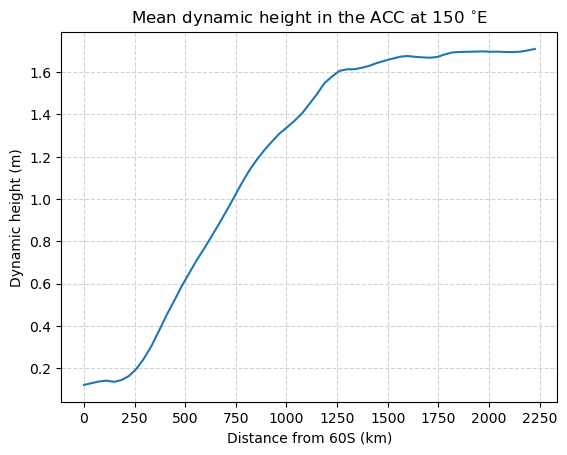

In [52]:
plt.plot(distance_from_60S, MDT_ACC)
plt.xlabel('Distance from 60S (km)')
plt.ylabel('Dynamic height (m)')
plt.title('Mean dynamic height in the ACC at 150 $^{\\circ}$E')
# Put a grid to be able to extract values visually
# But first increase the number of ticks
plt.xticks(np.arange(0, 2500, 250))
plt.grid(linestyle = '--', color = 'lightgrey')